In [1]:
import cv2
import numpy as np
import sys
from random import random
from matplotlib import pyplot as plt
from skimage.io import imread, imshow 

Изображение:

(480, 480, 3)


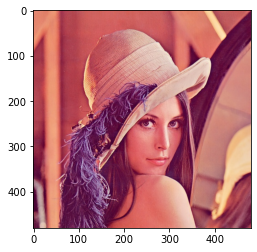

In [2]:
img = cv2.imread('C:\Photo1.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(img.shape)

Свертка с 5 фильтрами 3х3х3

In [7]:
weights = np.random.uniform(size = (5,3,3,3))
B = [random() for i in range(5)]
conv = np.zeros((img.shape[0]-2, img.shape[1]-2, 5), 'float')
for i in range(img.shape[0]-2):
    for j in range(img.shape[1]-2):        
        for M in range(5):
            conv[i][j][M] = B[M]
            for K in range(3):
                for J in range(3):
                    for I in range(3):
                        conv[i][j][M] += [weights[M][I][J][K] * img[i + I][j + J][K]]
print("convolution", conv.shape, conv, sep="\n")

convolution
(478, 478, 5)
[[[2242.48955973 2237.22324369 1977.34761176 2028.96681466 2130.6202797 ]
  [2255.79790832 2246.07448623 1991.80395452 2040.3293523  2136.3177644 ]
  [2269.06231985 2263.89386668 2005.98966647 2056.90485362 2150.5352797 ]
  ...
  [1939.54447756 1948.69031441 1727.64924232 1752.13214604 1892.87078972]
  [1823.31156232 1861.10407577 1640.60929402 1656.03418361 1818.2151429 ]
  [1584.97215344 1676.74316664 1440.70094318 1451.75069169 1649.90264826]]

 [[2246.26416503 2242.97116006 1986.45944954 2038.54971063 2135.88082699]
  [2255.51566895 2245.08845453 1991.23919231 2045.96344884 2138.19221101]
  [2268.69661418 2258.20470528 1999.68550701 2055.47167005 2148.45914146]
  ...
  [1816.09955011 1856.20007669 1636.93255754 1657.45648064 1815.92579682]
  [1639.18459138 1713.31495651 1487.95976589 1496.87543472 1683.75235355]
  [1362.62231894 1462.10207214 1252.16034214 1218.49909355 1453.77297805]]

 [[2254.63285027 2247.64126388 1988.58929751 2045.08675656 2141.035901

Нормализация:

In [11]:
norm = np.zeros(conv.shape,'float')
a = [random() for i in range(5)]
b = [random() for i in range(5)]
for M in range(5):
    mean = np.mean(conv[:,:,M])
    std = np.std(conv[:,:,M])
    norm[:,:,M] = a[M]*(conv[:,:,M]-mean)/std + b[M]
print("normal", norm.shape, norm, sep="\n")

normal
(478, 478, 5)
[[[ 0.72794404  0.40962968  1.52007918  0.54498406  1.03514187]
  [ 0.74820621  0.4100352   1.54559446  0.56002909  1.04400923]
  [ 0.76840149  0.41085159  1.57063207  0.58197654  1.06613686]
  ...
  [ 0.26670531  0.39641064  1.07936453  0.1784301   0.66511709]
  [ 0.08973884  0.3923979   0.92574006  0.05118777  0.54892571]
  [-0.27313671  0.38395146  0.5729042  -0.21930192  0.28697018]]

 [[ 0.73369093  0.40989302  1.53616147  0.55767268  1.0433292 ]
  [ 0.7477765   0.40999002  1.54459766  0.56748913  1.04692655]
  [ 0.7678447   0.41059094  1.5595053   0.58007887  1.06290563]
  ...
  [ 0.07875844  0.39217322  0.91925067  0.05307102  0.54536266]
  [-0.19059741  0.38562699  0.65631546 -0.1595527   0.33965265]
  [-0.61166788  0.37411775  0.24013228 -0.52814798 -0.01827901]]

 [[ 0.74643239  0.41010698  1.53992063  0.56632832  1.05135237]
  [ 0.75495533  0.41039164  1.55096802  0.57771077  1.05898314]
  [ 0.76748137  0.41097497  1.56722135  0.58550849  1.07111855]
  .

ReLU

In [13]:
relu = np.zeros(norm.shape, dtype=np.float32)
for m in range(relu.shape[0]):
    for i in range(relu.shape[1]):
        for j in range(relu.shape[2]):
            relu[m, i, j] = max(0,norm[m, i, j])
print("ReLU", relu.shape, relu, sep="\n")

ReLU
(478, 478, 5)
[[[0.727944   0.40962967 1.5200791  0.54498404 1.0351418 ]
  [0.7482062  0.4100352  1.5455945  0.5600291  1.0440092 ]
  [0.7684015  0.4108516  1.5706321  0.58197653 1.0661368 ]
  ...
  [0.2667053  0.39641064 1.0793645  0.17843011 0.6651171 ]
  [0.08973885 0.3923979  0.92574006 0.05118777 0.5489257 ]
  [0.         0.38395146 0.5729042  0.         0.28697017]]

 [[0.7336909  0.409893   1.5361614  0.5576727  1.0433292 ]
  [0.7477765  0.40999    1.5445976  0.56748915 1.0469265 ]
  [0.7678447  0.41059095 1.5595053  0.5800789  1.0629057 ]
  ...
  [0.07875844 0.39217323 0.91925067 0.05307102 0.54536265]
  [0.         0.385627   0.65631545 0.         0.33965266]
  [0.         0.37411776 0.24013229 0.         0.        ]]

 [[0.74643236 0.410107   1.5399206  0.5663283  1.0513524 ]
  [0.75495535 0.41039163 1.550968   0.57771075 1.0589831 ]
  [0.7674814  0.41097498 1.5672214  0.58550847 1.0711186 ]
  ...
  [0.         0.38381314 0.5885838  0.         0.27819234]
  [0.         0

Max POOLING 2x2

In [14]:
pre_pool = relu.shape[0]//2, relu.shape[1]//2, 5
pool = np.zeros(pre_pool,'float')
for M in range(5):
    for i in range(0,relu.shape[0],2):
        for j in range(0, relu.shape[1],2):
            pool[i//2,j//2,M] = max([relu[i,j,M], relu[i+1,j,M], relu[i,j+1,M], relu[i+1,j+1,M]])
print("POOLING", pool.shape, pool, sep="\n")

POOLING
(239, 239, 5)
[[[0.7482062  0.41003519 1.54559445 0.56748915 1.0469265 ]
  [0.77604902 0.41133434 1.58315718 0.59406191 1.08329844]
  [0.75264728 0.41087386 1.57734692 0.58447129 1.07703936]
  ...
  [0.37431684 0.39942706 1.18316185 0.28974113 0.74721444]
  [0.33620062 0.39821213 1.1339972  0.24267942 0.71563542]
  [0.08973885 0.39239791 0.92574006 0.05118777 0.5489257 ]]

 [[0.7654708  0.41073391 1.55700469 0.57919073 1.06837392]
  [0.78331786 0.41118973 1.58659244 0.59401876 1.081774  ]
  [0.76414216 0.41069141 1.55568933 0.58017623 1.07284212]
  ...
  [0.29869151 0.39826626 1.11344779 0.22715065 0.71936804]
  [0.         0.38963744 0.83146465 0.         0.46571872]
  [0.         0.37429881 0.2624262  0.         0.        ]]

 [[0.75924498 0.41072765 1.55837202 0.58108199 1.07074726]
  [0.77550757 0.41097516 1.57857573 0.5932911  1.07586503]
  [0.77097088 0.41116568 1.57607627 0.58458704 1.08804381]
  ...
  [0.         0.38775662 0.73782235 0.         0.4121002 ]
  [0.       

SoftMax

In [15]:
softmax = np.zeros(pool.shape,'float')
for i in range(0, pool.shape[0]):
    for j in range(0, pool.shape[1]):
        softmax[i,j,:] = np.array([np.e**a for a in pool[i,j,:]])/(np.array([np.e**a for a in pool[i,j,:]])).sum()
print("SoftMax", softmax.shape, softmax, sep="\n")

SoftMax
(239, 239, 5)
[[[0.1635159  0.11659883 0.36296212 0.13648206 0.2204411 ]
  [0.16315599 0.11329466 0.36570058 0.13600881 0.22183995]
  [0.16076914 0.11422795 0.36674583 0.13588289 0.22237419]
  ...
  [0.1505666  0.15439523 0.33806918 0.13835597 0.21861302]
  [0.15022246 0.15983288 0.33359038 0.13681041 0.21954387]
  [0.13878201 0.18783492 0.32018715 0.13353363 0.21966228]]

 [[0.16415075 0.11512844 0.3622444  0.13625187 0.22222455]
  [0.16400374 0.11304219 0.36619421 0.13571948 0.22104038]
  [0.16386226 0.115074   0.36161256 0.13632752 0.22312366]
  ...
  [0.14668616 0.16204435 0.33130904 0.13655868 0.22340178]
  [0.13575365 0.20043286 0.31178271 0.13575365 0.21627713]
  [0.17379057 0.25268655 0.22594174 0.17379057 0.17379057]]

 [[0.16308921 0.11509755 0.36264499 0.13647403 0.22269422]
  [0.16364835 0.11365727 0.36532527 0.13638796 0.22098115]
  [0.16292477 0.1136909  0.36445167 0.13522022 0.22371244]
  ...
  [0.1413421  0.20829176 0.29559951 0.1413421  0.21342455]
  [0.1816373